In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression as ols

/home/henny_mac/anaconda3/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [9]:
advertising = pd.read_csv('../Data/Advertising.csv', index_col = 0)

In [58]:
# Model and Data for Figure 3.1
model = sm.OLS(advertising.Sales, sm.add_constant(advertising.TV))
results = model.fit()
error_bars = []
for x,y,f in zip(advertising.TV,advertising.Sales,results.fittedvalues):
    error_bars += [(x,x), (y,f), 'g']

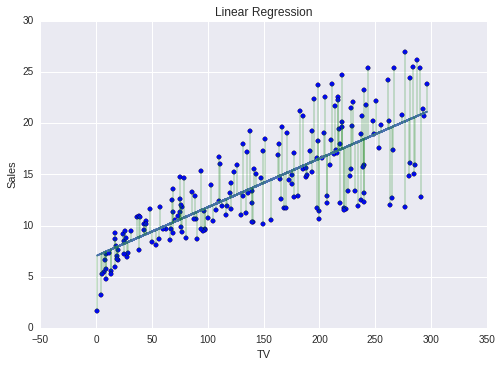

In [62]:
# Plot in Figure 3.1
# BTW, plotting the error bars was a pain in the ass.
# I ended up using this method: http://stackoverflow.com/a/21352863/4499429
# If you know a better method, please share
plt.scatter(advertising.TV,advertising.Sales)
plt.plot(advertising.TV,results.fittedvalues)
plt.plot(*error_bars, alpha=0.2)
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("Linear Regression")

In [81]:
# general Residual Sum of Squares depends only on Predicted and Actual values
def RSS(predicted, actual):
    return sum( (x-y)**2 for x,y in zip(predicted,actual))

In [88]:
RSS(results.fittedvalues, advertising.Sales)

2102.5305831313503

In [89]:
# In case you wanted direct computations like in the book
def cov(x,y):
    # covariance between X and Y
    n = len(x)
    x_mu = sum(x)/n
    y_mu = sum(y)/n
    return sum( (i-x_mu)*(j-y_mu) for i,j in zip(x,y))/n
    
def find_betas(x,y):
    Beta1 = cov(x,y)/cov(x,x)
    Beta0 = sum(y)/len(y) - Beta1*sum(x)/len(x)
    return Beta0, Beta1

def predict(B0, B1, x):
    return [ B0 + B1*i for i in x]

In [90]:
b0, b1 = find_betas(advertising.TV, advertising.Sales)
y_predicted = predict(b0,b1,advertising.TV)
RSS(y_predicted, advertising.Sales)

2102.5305831313522

In [91]:
delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)

In [103]:
X.shape

(160, 240)